<a href="https://colab.research.google.com/github/sharmasachin83/Data-Science-and-Machine-Learning-Theory-and-Projects-A-to-Z/blob/main/MFI_Parameterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

<ipython-input-6-4ed49fa60b09>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [ ]:
#MFI200 = pd.read_excel('MFI_Peer_Comparison_13032023_NoSec8.xlsx',sheet_name='MFI0-200', usecols="B : F")
#MFI1000 = pd.read_excel('MFI_Peer_Comparison_14112022.xlsx',sheet_name='MFI201-1000', usecols="B : F")
#MFI2000 = pd.read_excel('MFI_Peer_Comparison_31012023.xlsx',sheet_name='MFI1001-2000', usecols="B : F")
#MFI3000 = pd.read_excel('MFI_Peer_Comparison_14112022.xlsx',sheet_name='MFI2001-3000', usecols="B : F")
#MFI6000 = pd.read_excel('MFI_Peer_Comparison_01092022.xlsx',sheet_name='MFI4500-6000', usecols="B : F")
MFI6000plus = pd.read_excel('MFI_Peer_Comparison_13032023_NoSec8.xlsx',sheet_name='MFI6000+', usecols="B : F")

In [ ]:
import numpy as np

In [ ]:
from sklearn import preprocessing
X_Value = MFI6000plus.copy().values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)
X_scaled = min_max_scaler.fit_transform(X_Value)
X_df_scaled = pd.DataFrame(X_scaled, columns=MFI6000plus.columns)

In [ ]:
X_df_scaled

,GNPA,DER,ROA,NIM,OPEX Ratio
0,0.831985,0.539024,0.698926,1.000000,0.124764
1,0.000000,0.000000,0.059143,0.000000,0.000000
2,1.000000,0.645084,0.000000,0.559585,0.370510
3,0.516843,0.856098,0.111677,0.143342,1.000000
4,0.857566,1.000000,1.000000,0.453368,0.204159


In [ ]:
X_df_scaled['Entity_Mean'] = X_df_scaled.mean(axis=1)

In [ ]:
X_df_scaled

,DER,ROA,GNPA,OPEX,Entity_Mean
0,0.000000,1.000000,0.000000,0.000000,0.250000
1,0.193966,0.172107,1.000000,1.000000,0.591518
2,1.000000,0.000000,0.621212,0.193778,0.453748


In [ ]:
X_df_scaled = X_df_scaled.append(X_df_scaled.agg(['mean']))

In [ ]:
X_df_scaled

,GNPA,ROA,CRAR,DER,OPEX,Entity_Mean
0,3.293629,1.000000,3.075806,6.328734,6.734170,4.086468
1,10.000000,4.315789,8.722581,1.000000,6.938546,6.195383
2,2.047091,10.000000,5.688710,4.932255,4.946201,5.522851
3,5.578947,6.092105,10.000000,7.559026,10.000000,7.846016
4,1.000000,4.197368,1.000000,10.000000,1.000000,3.439474
mean,4.383934,5.121053,5.697419,5.964003,5.923783,5.418038


Text(0, 0.5, 'wcss')

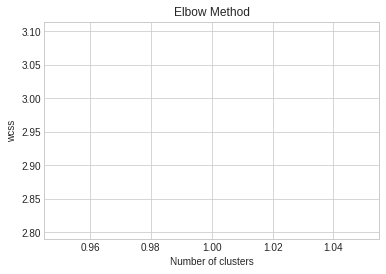

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,2):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,2), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_df_scaled)

In [ ]:
print(y_kmeans)

[1 0 0]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
kmeanModel = KMeans(n_clusters=4)
y=kmeanModel.fit(X_df_scaled).labels_
y = label_binarize(y, classes=[0,1,2,3])
clf=RandomForestClassifier()
clf.fit(df450,y)

RandomForestClassifier()

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 7.5 MB/s 


In [ ]:
import shap
explainer= shap.TreeExplainer(clf)
shap_values = explainer(df450).values

In [ ]:
#shap.summary_plot(shap_values, X_df_scaled)